In [3]:
import tensorflow
import tensorflow as tf
import keras
import os 
from PIL import Image
import matplotlib.pyplot as plt
from keras.datasets import cifar100
import numpy as np
import cv2
from tqdm import tqdm
import random

(X_train, y_train),(X_test, y_test)=cifar100.load_data()

os.mkdir('/Users/caglaoksuz/Desktop/dataset')
os.mkdir('/Users/caglaoksuz/Desktop/dataset/train')
os.mkdir('/Users/caglaoksuz/Desktop/dataset/test')

###bu for icerisinde cifar100 data seti icerinden istenilen klasorler olusturuluyor
for i in range(100):
    if(i==6):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'bee')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'bee')
        os.mkdir(path)
    if(i==32):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'flatfish')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'flatfish')
        os.mkdir(path)
    if(i==35):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'girl')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'girl')
        os.mkdir(path)
    if(i==43):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'lion')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'lion')
        os.mkdir(path)
    if(i==71):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'sea')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'sea')
        os.mkdir(path) 
    if(i==92):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'tulip')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'tulip')
        os.mkdir(path)     

In [ ]:
        
####Hazirlanilan klasorlere train icin cifar100 data setindeki train verileri aliniyor
for i in range(50000):
    if(y_train[i]==6):
        path='/Users/caglaoksuz/Desktop/dataset/train/bee'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==32):
        path='/Users/caglaoksuz/Desktop/dataset/train/flatfish'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==35):
        path='/Users/caglaoksuz/Desktop/dataset/train/girl'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==43):
        path='/Users/caglaoksuz/Desktop/dataset/train/lion'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==71):
        path='/Users/caglaoksuz/Desktop/dataset/train/sea'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])    
    if(y_train[i]==92):
        path='/Users/caglaoksuz/Desktop/dataset/train/tulip'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])  

In [ ]:
####Hazirlanilan klasorlere test icin cifar100 data setindeki validation verileri aliniyor
for i in range(10000):
    if(y_test[i]==6):
        path='/Users/bugrapolat/Desktop/dataset/test/bee'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==32):
        path='/Users/bugrapolat/Desktop/dataset/test/flatfish'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==35):
        path='/Users/caglaoksuz/Desktop/dataset/test/girl'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==43):
        path='/Users/caglaoksuz/Desktop/dataset/test/lion'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==71):
        path='/Users/caglaoksuz/Desktop/dataset/test/sea'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])    
    if(y_test[i]==92):
        path='/Users/caglaoksuz/Desktop/dataset/test/tulip'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])    

In [6]:
TRAIN_DIR = "/Users/caglaoksuz/Desktop/dataset/train"
TEST_DIR = "/Users/caglaoksuz/Desktop/dataset/test"
CATEGORIES = ["tulip", "sea", "lion", "girl", "flatfish", "bee"]
CATEGORIES_2 = ["tulip", "sea", "lion", "girl", "flatfish", "bee"]
        
def label_img(img):
    word_label = img.split('.')[-1]
    if word_label == '1': return 1
    elif word_label == '2': return 2
    elif word_label == '3': return 3
    elif word_label == '4': return 4
    elif word_label == '5': return 5
    elif word_label == '6': return 6

In [7]:
from tqdm import tqdm
import random
import numpy as np
import os
import cv2
def create_training_data():
    training_data = []
    
    for category in CATEGORIES:                  #Image dosyalarini cagirmak icin   
        path = os.path.join(TRAIN_DIR,category)  # Image dosyalarinin yollarinin yolunu getirir
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)):  # goruntuleri sira ile cagiririz
            label = label_img(img)          
            try:                 
                img_array = cv2.imread(os.path.join(path,img))            
                training_data.append([np.array(img_array), np.array(class_num)])        
            except Exception as e:  
                pass
    random.shuffle(training_data)              
    np.save('train_data.npy', training_data)   
    return training_data
    
train_data=create_training_data()      
print(len(train_data))       #toplam train_data sayisini ekrana yazdirdim

100%|██████████| 500/500 [00:00<00:00, 872.82it/s] 


3000


In [8]:
def create_test_data():
    testing_data = []
    for category_2 in CATEGORIES_2:       
        path = os.path.join(TEST_DIR,category_2)
        class_num=CATEGORIES_2.index(category_2)        
        for img in tqdm(os.listdir(path)):
            label = label_img(img)         
            try:
                img_array = cv2.imread(os.path.join(path,img))
                testing_data.append([np.array(img_array), class_num])        
            except Exception as e:
                pass           
    random.shuffle(testing_data) #karistirir
    np.save('test_data.npy', testing_data)    
    return testing_data    

test_data=create_test_data()

print(len(test_data))

100%|██████████| 100/100 [00:00<00:00, 3327.78it/s]


600


In [9]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))   #convNet 1
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))                   #covNet  2
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))                   #covNet  3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool I
model.add(Conv2D(64, (3, 3)))                   #covNet  4
model.add(Activation('relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool II
model.add(Conv2D(128, (3, 3)))                  #covNet 5
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool  III

model.add(Flatten())                            #Flatten#
model.add(Dense(128))                           #Dense 1
model.add(Activation('relu'))
model.add(Dense(256))                           #Dense 2
model.add(Activation('relu'))

model.add(Dense(6, activation='softmax'))       #Dense 3

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


X = np.array([i[0] for i in train_data]).reshape(-1,32,32,3)
Y = [i[1] for i in train_data]
Y = np.reshape(Y, (-1, 1))

X_test = np.array([i[0] for i in test_data]).reshape(-1,32,32,3)
Y_test = [i[1] for i in test_data]
Y_test = np.reshape(Y_test, (-1, 1))

In [10]:
history=model.fit(X, Y, epochs=30,
          batch_size=50, validation_data = (X_test, Y_test), shuffle=True)

Train on 3000 samples, validate on 600 samples
Epoch 1/30
3000/3000 [==============================] - 21s 7ms/step - loss: 1.9370 - acc: 0.3680 - val_loss: 1.5666 - val_acc: 0.4083
Epoch 2/30
3000/3000 [==============================] - 18s 6ms/step - loss: 1.3021 - acc: 0.5013 - val_loss: 1.2089 - val_acc: 0.5383
Epoch 3/30
3000/3000 [==============================] - 18s 6ms/step - loss: 1.1260 - acc: 0.5677 - val_loss: 1.1870 - val_acc: 0.5617
Epoch 4/30
3000/3000 [==============================] - 18s 6ms/step - loss: 1.0108 - acc: 0.6237 - val_loss: 1.0313 - val_acc: 0.6183
Epoch 5/30
3000/3000 [==============================] - 19s 6ms/step - loss: 0.9249 - acc: 0.6493 - val_loss: 1.0358 - val_acc: 0.6217
Epoch 6/30
3000/3000 [==============================] - 21s 7ms/step - loss: 0.8482 - acc: 0.6720 - val_loss: 1.0119 - val_acc: 0.6233
Epoch 7/30
3000/3000 [==============================] - 20s 7ms/step - loss: 0.7987 - acc: 0.7110 - val_loss: 0.8659 - val_acc: 0.6783
Epoch 8/

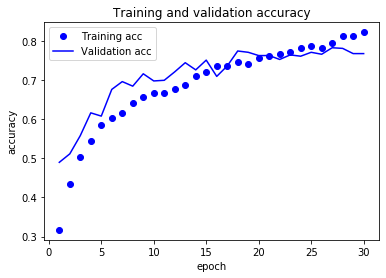

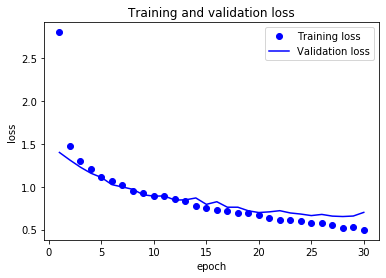

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))   #convNet 1
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))                   #covNet  2
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))                   #covNet  3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool I
model.add(Conv2D(64, (3, 3)))                   #covNet  4
model.add(Dropout(0.25))
model.add(Activation('relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool II
model.add(Conv2D(128, (3, 3)))                  #covNet 5
model.add(Dropout(0.25))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool  III

model.add(Flatten())                            #Flatten#
model.add(Dense(128))                           #Dense 1
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(256))                           #Dense 2
model.add(Activation('relu'))

model.add(Dense(6, activation='softmax'))       #Dense 3

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


X = np.array([i[0] for i in train_data]).reshape(-1,32,32,3)
Y = [i[1] for i in train_data]
Y = np.reshape(Y, (-1, 1))

X_test = np.array([i[0] for i in test_data]).reshape(-1,32,32,3)
Y_test = [i[1] for i in test_data]
Y_test = np.reshape(Y_test, (-1, 1))


In [45]:
history=model.fit(X, Y, epochs=30,
          batch_size=50, validation_data = (X_test, Y_test), shuffle=True)

Train on 3000 samples, validate on 600 samples
Epoch 1/30
3000/3000 [==============================] - 21s 7ms/step - loss: 2.8055 - acc: 0.3170 - val_loss: 1.4010 - val_acc: 0.4900
Epoch 2/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.4776 - acc: 0.4340 - val_loss: 1.3120 - val_acc: 0.5117
Epoch 3/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.2967 - acc: 0.5040 - val_loss: 1.2289 - val_acc: 0.5583
Epoch 4/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.2034 - acc: 0.5440 - val_loss: 1.1583 - val_acc: 0.6167
Epoch 5/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.1196 - acc: 0.5860 - val_loss: 1.1087 - val_acc: 0.6083
Epoch 6/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.0679 - acc: 0.6023 - val_loss: 1.0248 - val_acc: 0.6767
Epoch 7/30
3000/3000 [==============================] - 20s 7ms/step - loss: 1.0238 - acc: 0.6160 - val_loss: 0.9975 - val_acc: 0.6967
Epoch 8/

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator( rotation_range=90,
                            width_shift_range=0.1)

datagen.fit(X)
model.fit_generator(datagen.flow(X,Y, batch_size=100),
                   epochs=30,
                   validation_data=(X_test, Y_test))

Epoch 1/30
30/30 [==============================] - 19s 646ms/step - loss: 1.2583 - acc: 0.6423 - val_loss: 0.9918 - val_acc: 0.6800
Epoch 2/30
30/30 [==============================] - 18s 612ms/step - loss: 0.9915 - acc: 0.6560 - val_loss: 0.6995 - val_acc: 0.7450
Epoch 3/30
30/30 [==============================] - 18s 599ms/step - loss: 0.8934 - acc: 0.6840 - val_loss: 0.7116 - val_acc: 0.7600
Epoch 4/30
30/30 [==============================] - 18s 596ms/step - loss: 0.8567 - acc: 0.6977 - val_loss: 0.6818 - val_acc: 0.7800
Epoch 5/30
30/30 [==============================] - 17s 583ms/step - loss: 0.8379 - acc: 0.6947 - val_loss: 0.7210 - val_acc: 0.7617
Epoch 6/30
30/30 [==============================] - 17s 582ms/step - loss: 0.8131 - acc: 0.7037 - val_loss: 0.7928 - val_acc: 0.7367
Epoch 7/30
30/30 [==============================] - 17s 583ms/step - loss: 0.8127 - acc: 0.6983 - val_loss: 0.6749 - val_acc: 0.7817
Epoch 8/30
30/30 [==============================] - 18s 585ms/step - 

100%|██████████| 100/100 [00:00<00:00, 3711.67it/s]


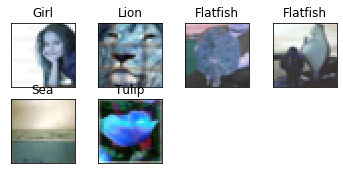

In [13]:
import matplotlib.pyplot as plt
test_data = create_test_data()

fig=plt.figure()

for num,data in enumerate(test_data[:6]):

    img_num = data[1]
    img_data = data[0]

    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(-1,32,32,3)
    model_out = model.predict([data])[0]

    if np.argmax(model_out) == 0: str_label='Tulip'
    elif np.argmax(model_out) == 1:  str_label='Sea'
    elif np.argmax(model_out) == 2:  str_label='Lion'
    elif np.argmax(model_out) == 3:  str_label='Girl'
    elif np.argmax(model_out) == 4:  str_label='Flatfish'
    elif np.argmax(model_out) == 5:  str_label='Bee'
           
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
pip install tensorflow==2.2